In [1]:
pip install factor_analyzer

In [2]:
from factor_analyzer import FactorAnalyzer
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from prophet import Prophet
import numpy as np

In [3]:
df=pd.read_csv("df_complete_renamed_columns.csv")
df

,Fecha,CNA_Alambre,CNA_Alambre y derivados,CNA_Alambrón,CNA_Arrabio,CNA_Barras,CNA_Caliente,CNA_Carbón Mineral,CNA_Chatarra,"CNA_Cintas, Tiras y Flejes",...,ventas_canacero_LAMINA EN FRIO,ventas_canacero_LAMINA GALVANIZADA,ventas_canacero_PERFILES ESTRUCTURALES,ventas_canacero_PERFILES COMERCIALES,PRECIO_TERMINADOS_anglePerfilesComerciales,PRECIO_TERMINADOS_hotRolledCoil,PRECIO_TERMINADOS_platePlacaDeHoja,PRECIO_TERMINADOS_wBeamsPerfilesEstructurales,PRECIO_SEMIT_slabBlackSea,PRECIO_SEMIT_slabBrasil
0,2018-01,171578.151089,168843.265689,207085.271324,416118.876527,128664.946534,79379.086671,1.390474e+06,926683.465208,-3062.329596,...,994,175,11091,3079,32.80,34.522500,36.0625,36.0000,524.000,522.500
1,2018-02,165000.695438,162228.950326,187509.774394,404561.530547,109932.759115,82725.700126,1.419431e+06,886758.035208,-2275.742793,...,753,143,9140,2669,33.30,37.280000,40.2500,37.5625,541.250,536.875
2,2018-03,175674.341701,168147.237135,175567.029039,448736.195834,121274.498855,82690.610054,1.339079e+06,982609.455208,-2365.407605,...,935,163,10238,3008,33.80,41.834000,45.2000,39.1250,577.500,572.500
3,2018-04,177963.558748,170693.696316,211341.308565,464392.357705,109630.313250,93146.235552,1.138710e+06,920485.875208,914.875964,...,835,148,8067,3560,36.55,43.205000,47.0000,42.0000,565.000,593.750
4,2018-05,168417.757907,162710.388461,174830.962803,335999.528002,125241.009143,86781.230028,9.970485e+05,980549.745208,-213.142575,...,939,124,12012,3641,36.55,44.034000,46.3125,42.0000,532.500,575.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-08,165910.371602,162654.971559,235360.591619,113446.081886,126365.304918,118271.997255,8.192972e+05,886137.779800,3407.119332,...,2447,1099,10565,4513,55.80,38.493913,74.9000,64.7500,464.375,565.000
68,2023-09,174441.278982,171331.582338,238775.923161,80735.725320,117723.352882,96738.821120,8.185817e+05,885214.069800,2278.646980,...,2784,1059,9989,4012,55.80,33.954000,74.1250,64.7500,494.125,545.000
69,2023-10,166568.337656,162373.907175,238762.377330,84746.996311,130400.006153,96086.356634,6.630554e+05,941309.039800,2103.703605,...,3309,1350,10677,4261,55.80,37.205000,71.1000,64.7500,467.800,525.625
70,2023-11,188783.719761,185273.189197,248940.638547,80051.629395,123237.808629,111832.248868,7.498532e+05,916333.369800,2774.412697,...,2986,1575,9848,4270,55.80,46.221500,66.7500,64.7500,469.375,587.500


In [4]:
threshold = 0.6
df_numeric=df.drop(columns=[ 'Fecha'], errors='ignore')
df_numeric_t = df_numeric.select_dtypes(include='number')
cols=df[['CNA_PLANOS','CNA_Lámina con Recubrimiento']]
cols

# Initialize a set to store variable names with high correlation
highly_correlated_vars = set()

# Compute correlations
for col1 in df_numeric_t.columns:
    for col2 in cols.columns:
        corr = df_numeric_t[col1].corr(cols[col2])
        if abs(corr) > threshold:
            highly_correlated_vars.add(col1)
            highly_correlated_vars.add(col2)
            print(f"{col1} - {col2}: correlation = {corr:.2f}")

# Final result
print("\nVariables with |correlation| > 0.7:")
print(highly_correlated_vars)

CNA_Lámina con Recubrimiento - CNA_PLANOS: correlation = 0.80
CNA_Lámina con Recubrimiento - CNA_Lámina con Recubrimiento: correlation = 1.00
CNA_PLANOS - CNA_PLANOS: correlation = 1.00
CNA_PLANOS - CNA_Lámina con Recubrimiento: correlation = 0.80
CNA_Planos de Acero Aleado - CNA_PLANOS: correlation = 0.77
CNA_TUBOS CON Y SIN COSTURA - CNA_PLANOS: correlation = 0.66
CNA_Tubos con Costura - CNA_PLANOS: correlation = 0.61
consumo_laminados_méxico - CNA_PLANOS: correlation = 0.97
consumo_laminados_méxico - CNA_Lámina con Recubrimiento: correlation = 0.79
consumo_largos_méxico - CNA_PLANOS: correlation = 0.70
consumo_largos_méxico - CNA_Lámina con Recubrimiento: correlation = 0.61
consumo_planos_méxico - CNA_PLANOS: correlation = 1.00
consumo_planos_méxico - CNA_Lámina con Recubrimiento: correlation = 0.80
impo_laminados_méxico - CNA_PLANOS: correlation = 0.88
impo_laminados_méxico - CNA_Lámina con Recubrimiento: correlation = 0.76
impo_largos_méxico - CNA_PLANOS: correlation = 0.73
impo_p

In [5]:
df_final2=df[["Fecha"]+list(highly_correlated_vars)] # df filtrado ya con las columnas que pasan el umbral
df_final2

,Fecha,CNA_Planos de Acero Aleado,CNA_TUBOS CON Y SIN COSTURA,consumo_laminados_méxico,impo_planos_brasil,impo_laminados_méxico,impo_planos_méxico,prod_laminados_méxico,prod_planos_méxico,impo_largos_méxico,CNA_PLANOS,consumo_planos_méxico,CNA_Tubos con Costura,consumo_largos_méxico,CNA_Lámina con Recubrimiento
0,2018-01,135109.061258,81974.441344,2163.106881,143.091,830.971594,673.429050,1607.193643,770.146813,142.812529,1.334947e+06,1334.947138,49576.167150,795.761469,379223.579186
1,2018-02,119510.208443,38982.266717,1957.082640,82.286,726.746975,592.725119,1556.176769,761.866623,126.756584,1.236832e+06,1236.831900,41780.244033,723.048718,354291.919549
2,2018-03,188670.099244,71200.319632,2201.428714,145.543,853.957399,730.678231,1745.844803,863.321877,114.454704,1.432077e+06,1432.076708,42795.540009,740.947226,385708.887123
3,2018-04,149263.455606,96065.322373,2200.330345,147.238,862.456858,714.672826,1710.239661,832.753525,138.259006,1.404093e+06,1404.092741,62375.332984,762.547615,413319.697698
4,2018-05,185917.387628,42492.082585,2178.340664,132.972,919.770018,761.837078,1681.513727,786.080621,144.090818,1.389706e+06,1389.706412,44113.359591,790.255530,409209.874720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-08,145432.415102,165572.726034,2586.205469,255.465,1204.909417,985.817015,1638.009540,804.066890,197.101752,1.670717e+06,1670.717698,121843.759145,871.758805,463122.706876
68,2023-09,158954.591075,134586.957596,2475.743528,331.758,1113.635981,901.500012,1650.406371,789.159750,196.604749,1.574722e+06,1574.722590,122610.243011,889.044223,453312.635700
69,2023-10,164805.356465,162918.989376,2563.084486,226.722,1083.893613,916.432694,1722.543621,830.079050,157.690859,1.638523e+06,1638.523980,128201.177437,889.842694,452186.458223
70,2023-11,137299.509867,161068.673929,2458.436023,232.648,1009.119001,835.734316,1704.537360,795.201800,156.016328,1.502094e+06,1502.094228,115097.576908,910.370699,456068.081415


In [6]:
columnas_sf=list(df_final2.columns)
columnas_sf=columnas_sf[1:]
columnas_sf

['CNA_Planos de Acero Aleado',
 'CNA_TUBOS CON Y SIN COSTURA',
 'consumo_laminados_méxico',
 'impo_planos_brasil',
 'impo_laminados_méxico',
 'impo_planos_méxico',
 'prod_laminados_méxico',
 'prod_planos_méxico',
 'impo_largos_méxico',
 'CNA_PLANOS',
 'consumo_planos_méxico',
 'CNA_Tubos con Costura',
 'consumo_largos_méxico',
 'CNA_Lámina con Recubrimiento']

In [7]:
pip install giotto-tda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.6/460.6 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not cur

In [ ]:
pip install umap-learn

In [7]:
from gtda.time_series import TakensEmbedding
from gtda.metaestimators import CollectionTransformer
from gtda.diagrams import PersistenceEntropy, Scaler
from gtda.pipeline import Pipeline
from gtda.time_series import SingleTakensEmbedding
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401, required for 3D projection
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly.io as pio
from umap import UMAP

In [8]:
def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, verbose: bool=True) -> np.ndarray:
    """Fits a Takens embedder and displays optimal search parameters."""
    y_embedded = embedder.fit_transform(y)

    if verbose:
        print(f"Shape of embedded time series: {y_embedded.shape}")
        print(
            f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}"
        )

    return y_embedded

In [ ]:
max_embedding_dimension = 10
max_time_delay = 5
stride = 2

embedder_periodic = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

In [ ]:
# columnas_importantes= ['impo_planos_venezuela',
#  '02.01 LAMINA EN CALIENTE',
#  'PLANOS',
#  'Carbón Mineral',
#  'Planos de Acero al Silicio',
#  'Lámina con Recubrimiento',
#  'anglePerfilesComerciales',
#  'platePlacaDeHoja',
#  'expo_planos_ecuador',
#  'HIERRO DE PRIMERA FUSIÓN',
#  '04.01 LAMINA GALVANIZADA',
#  '03.01 LAMINA EN FRIO',
#  'Arrabio',
#  'Planchón',
#  'wBeamsPerfilesEstructurales']

In [ ]:
""""
for col in columnas_sf:
    print(f"\nProcessing column: {col}")

    # Step 1: Fit and embed the time series
    y_embedded = fit_embedder(embedder_periodic, df_final2[col])

    # Step 2: Reduce to 3D using t-SNE
    tsne = TSNE(n_components=3, random_state=42, perplexity=10)
    y_tsne = tsne.fit_transform(y_embedded)

    # Step 3: Create 3D scatter plot with Plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=y_tsne[:, 0],
        y=y_tsne[:, 1],
        z=y_tsne[:, 2],
        mode='markers',
        marker=dict(
            size=4,
            color=np.arange(len(y_tsne)),  # Optional: use index as color
            colorscale='Viridis',
            opacity=0.8
        ),
        text=df_final2['Fecha'].iloc[:len(y_tsne)].astype(str)  # Optional hover text
    )])

    fig.update_layout(
        title=f'3D t-SNE of Embedded Time Series: {col}',
        scene=dict(
            xaxis_title='t-SNE 1',
            yaxis_title='t-SNE 2',
            zaxis_title='t-SNE 3'
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    fig.show()
"""

'"\nfor col in columnas_sf:\n    print(f"\nProcessing column: {col}")\n    \n    # Step 1: Fit and embed the time series\n    y_embedded = fit_embedder(embedder_periodic, df_final2[col])\n\n    # Step 2: Reduce to 3D using t-SNE\n    tsne = TSNE(n_components=3, random_state=42, perplexity=10)\n    y_tsne = tsne.fit_transform(y_embedded)\n\n    # Step 3: Create 3D scatter plot with Plotly\n    fig = go.Figure(data=[go.Scatter3d(\n        x=y_tsne[:, 0],\n        y=y_tsne[:, 1],\n        z=y_tsne[:, 2],\n        mode=\'markers\',\n        marker=dict(\n            size=4,\n            color=np.arange(len(y_tsne)),  # Optional: use index as color\n            colorscale=\'Viridis\',\n            opacity=0.8\n        ),\n        text=df_final2[\'Fecha\'].iloc[:len(y_tsne)].astype(str)  # Optional hover text\n    )])\n\n    fig.update_layout(\n        title=f\'3D t-SNE of Embedded Time Series: {col}\',\n        scene=dict(\n            xaxis_title=\'t-SNE 1\',\n            yaxis_title=\'t-S

In [ ]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import umap.umap_ as umap

reducer = umap.UMAP(n_components=3, random_state=42)

max_embedding_dimension = 5
max_time_delay = 3
stride = 1

embedder_periodic = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

# Ensure fecha is datetime
df_final2['fecha'] = pd.to_datetime(df_final2['Fecha'])

# Split dataset
df_pre = df_final2[df_final2['fecha'] < '2020-03-01']
df_covid = df_final2[(df_final2['fecha'] >= '2020-03-01') & (df_final2['fecha'] < '2022-01-01')]
df_post = df_final2[df_final2['fecha'] >= '2022-01-01']



# ------- Pre-COVID --------
for col in columnas_sf:
    print(f"\nProcessing Pre-COVID column: {col}")

    series = df_pre[col].dropna().values
    if len(series) < (embedder_periodic.dimension - 1) * embedder_periodic.time_delay:
        print("Not enough data")
        continue

    y_embedded = embedder_periodic.fit_transform(series)
    y_umap = reducer.fit_transform(y_embedded)

    fig = go.Figure(data=[go.Scatter3d(
        x=y_umap[:, 0],
        y=y_umap[:, 1],
        z=y_umap[:, 2],
        mode='markers',
        marker=dict(
            size=4,
            color=np.arange(len(y_umap)),
            colorscale='Viridis',
            opacity=0.8
        ),
        text=df_pre['fecha'].iloc[:len(y_umap)].astype(str)
    )])

    fig.update_layout(
        title=f'3D UMAP of Embedded Time Series (Pre-COVID): {col}',
        scene=dict(
            xaxis_title='UMAP 1',
            yaxis_title='UMAP 2',
            zaxis_title='UMAP 3'
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )
    fig.show()

<ipython-input-12-265883aa94b4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2['fecha'] = pd.to_datetime(df_final2['Fecha'])
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



Processing Pre-COVID column: prod_planos_méxico



Processing Pre-COVID column: consumo_laminados_méxico



Processing Pre-COVID column: CNA_Lámina con Recubrimiento



Processing Pre-COVID column: consumo_largos_méxico



Processing Pre-COVID column: CNA_Tubos con Costura



Processing Pre-COVID column: impo_laminados_méxico



Processing Pre-COVID column: impo_planos_brasil



Processing Pre-COVID column: impo_planos_méxico



Processing Pre-COVID column: prod_laminados_méxico



Processing Pre-COVID column: impo_largos_méxico



Processing Pre-COVID column: CNA_TUBOS CON Y SIN COSTURA



Processing Pre-COVID column: CNA_PLANOS



Processing Pre-COVID column: consumo_planos_méxico



Processing Pre-COVID column: CNA_Planos de Acero Aleado


In [ ]:
# ------- COVID --------
for col in columnas_sf:
    print(f"\nProcessing COVID column: {col}")

    series = df_covid[col].dropna().values
    if len(series) < (embedder_periodic.dimension - 1) * embedder_periodic.time_delay:
        print("Not enough data")
        continue

    y_embedded = embedder_periodic.fit_transform(series)
    y_umap = reducer.fit_transform(y_embedded)

    fig = go.Figure(data=[go.Scatter3d(
        x=y_umap[:, 0],
        y=y_umap[:, 1],
        z=y_umap[:, 2],
        mode='markers',
        marker=dict(
            size=4,
            color=np.arange(len(y_umap)),
            colorscale='Plasma',
            opacity=0.8
        ),
        text=df_covid['fecha'].iloc[:len(y_umap)].astype(str)
    )])

    fig.update_layout(
        title=f'3D UMAP of Embedded Time Series (COVID): {col}',
        scene=dict(
            xaxis_title='UMAP 1',
            yaxis_title='UMAP 2',
            zaxis_title='UMAP 3'
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )
    fig.show()


Processing COVID column: prod_planos_méxico



Processing COVID column: consumo_laminados_méxico



Processing COVID column: CNA_Lámina con Recubrimiento



Processing COVID column: consumo_largos_méxico



Processing COVID column: CNA_Tubos con Costura



Processing COVID column: impo_laminados_méxico



Processing COVID column: impo_planos_brasil



Processing COVID column: impo_planos_méxico



Processing COVID column: prod_laminados_méxico



Processing COVID column: impo_largos_méxico



Processing COVID column: CNA_TUBOS CON Y SIN COSTURA



Processing COVID column: CNA_PLANOS



Processing COVID column: consumo_planos_méxico



Processing COVID column: CNA_Planos de Acero Aleado


In [ ]:
# ------- Post-COVID --------
for col in columnas_sf:
    print(f"\nProcessing Post-COVID column: {col}")

    series = df_post[col].dropna().values
    if len(series) < (embedder_periodic.dimension - 1) * embedder_periodic.time_delay:
        print("Not enough data")
        continue

    y_embedded = embedder_periodic.fit_transform(series)
    y_umap = reducer.fit_transform(y_embedded)

    fig = go.Figure(data=[go.Scatter3d(
        x=y_umap[:, 0],
        y=y_umap[:, 1],
        z=y_umap[:, 2],
        mode='markers',
        marker=dict(
            size=4,
            color=np.arange(len(y_umap)),
            colorscale='Cividis',
            opacity=0.8
        ),
        text=df_post['fecha'].iloc[:len(y_umap)].astype(str)
    )])

    fig.update_layout(
        title=f'3D UMAP of Embedded Time Series (Post-COVID): {col}',
        scene=dict(
            xaxis_title='UMAP 1',
            yaxis_title='UMAP 2',
            zaxis_title='UMAP 3'
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )
    fig.show()



Processing Post-COVID column: prod_planos_méxico



Processing Post-COVID column: consumo_laminados_méxico


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1




Processing Post-COVID column: CNA_Lámina con Recubrimiento



Processing Post-COVID column: consumo_largos_méxico



Processing Post-COVID column: CNA_Tubos con Costura



Processing Post-COVID column: impo_laminados_méxico


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1




Processing Post-COVID column: impo_planos_brasil



Processing Post-COVID column: impo_planos_méxico



Processing Post-COVID column: prod_laminados_méxico



Processing Post-COVID column: impo_largos_méxico



Processing Post-COVID column: CNA_TUBOS CON Y SIN COSTURA



Processing Post-COVID column: CNA_PLANOS



Processing Post-COVID column: consumo_planos_méxico



Processing Post-COVID column: CNA_Planos de Acero Aleado


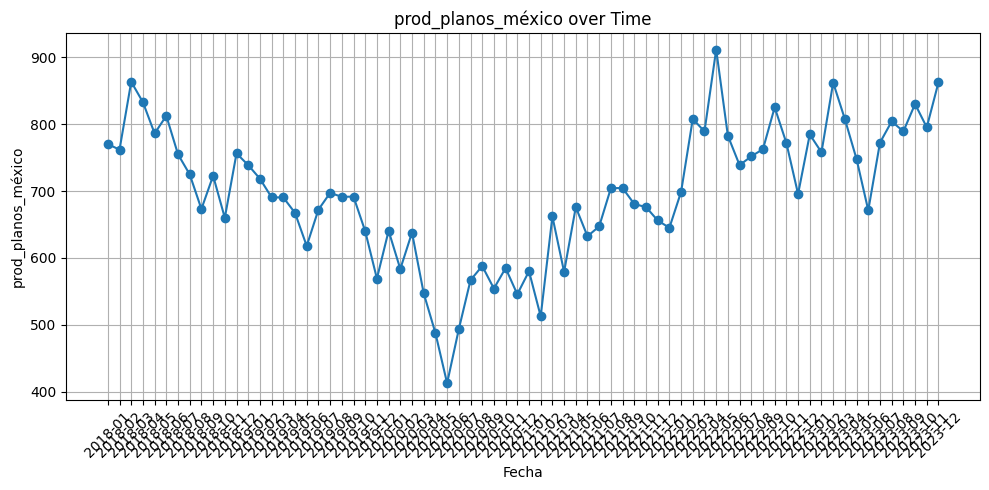

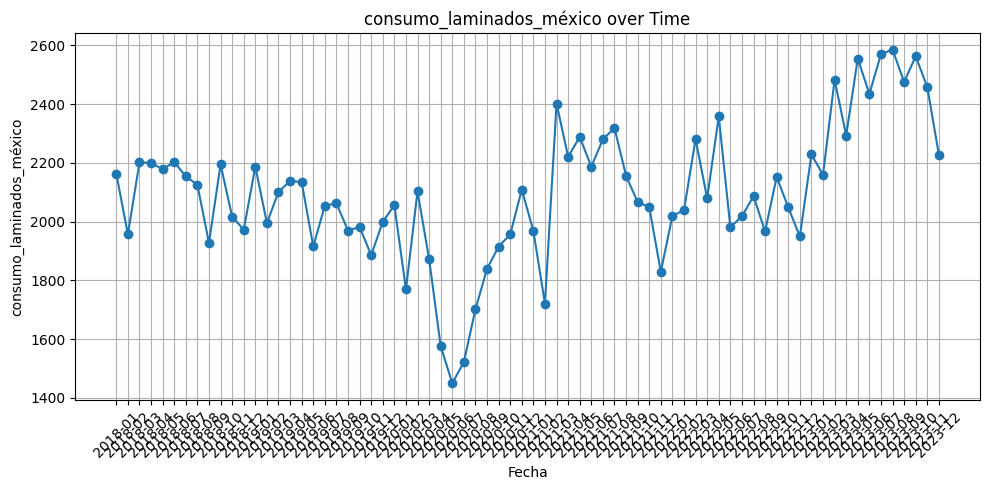

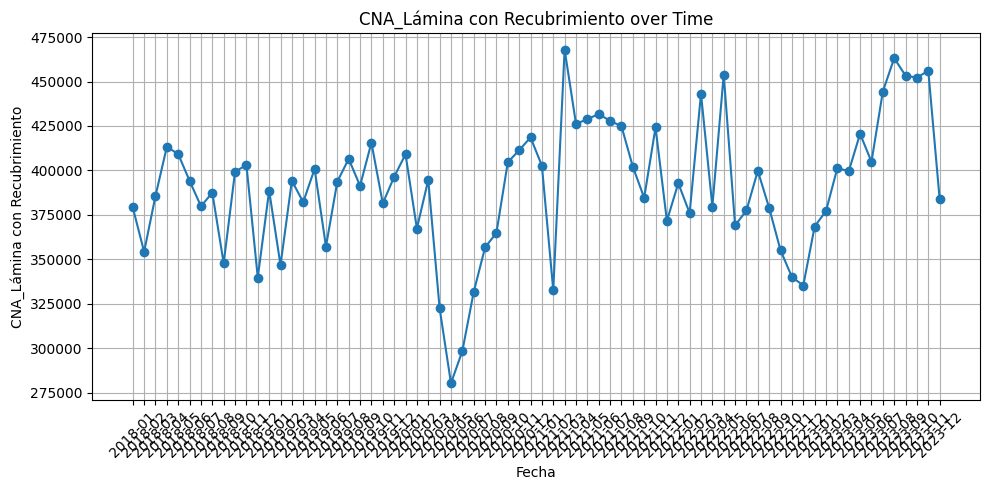

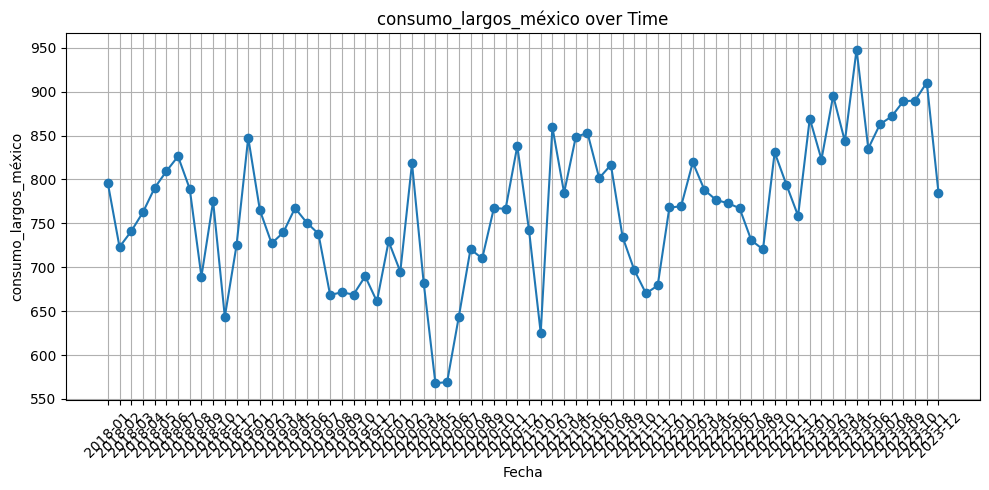

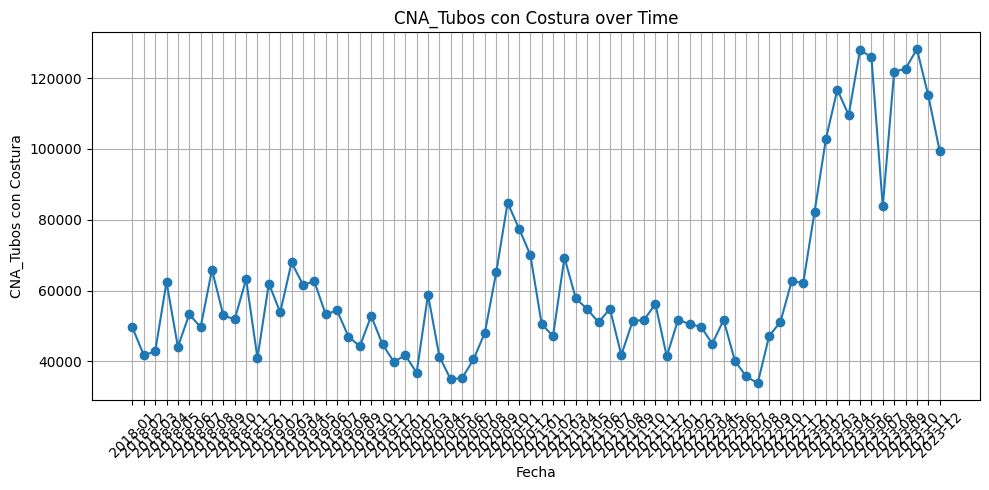

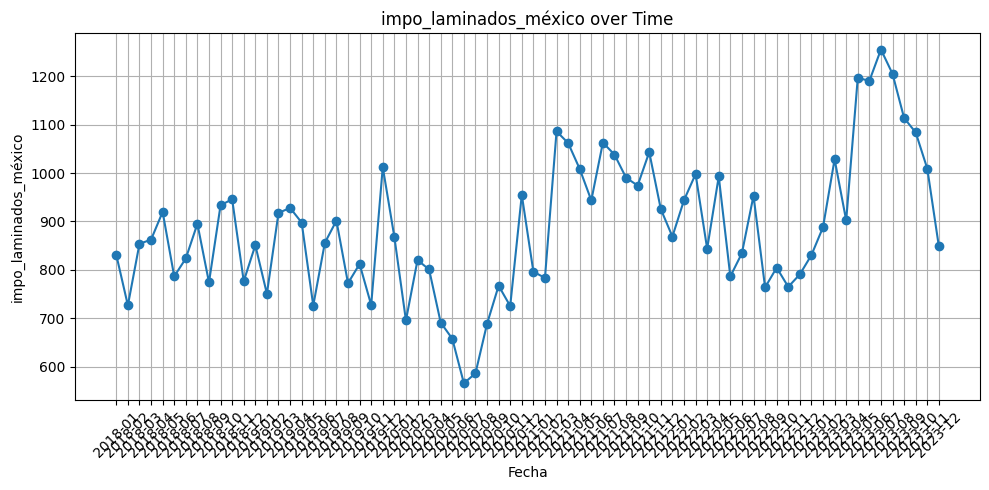

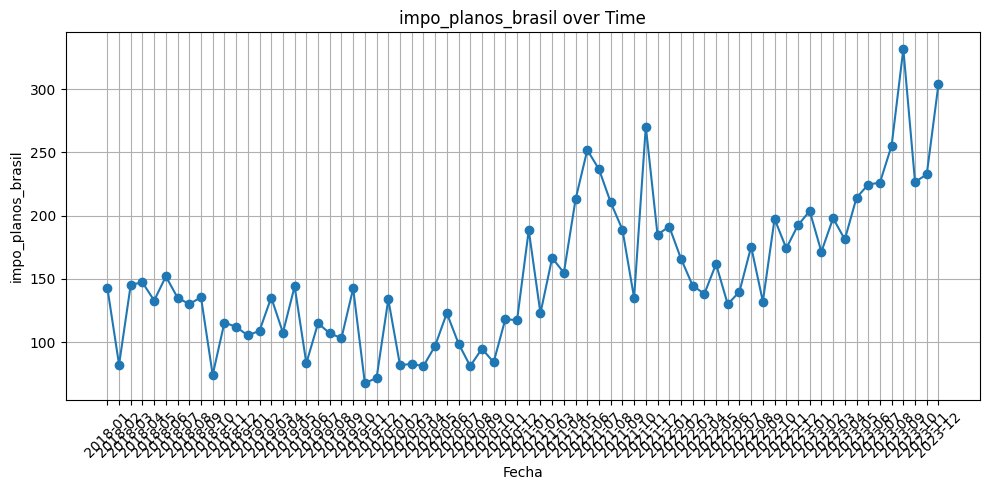

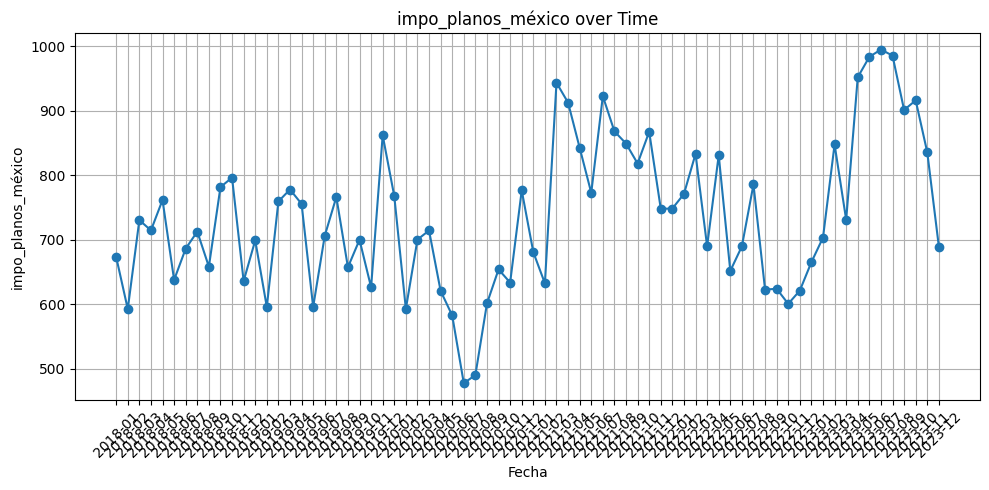

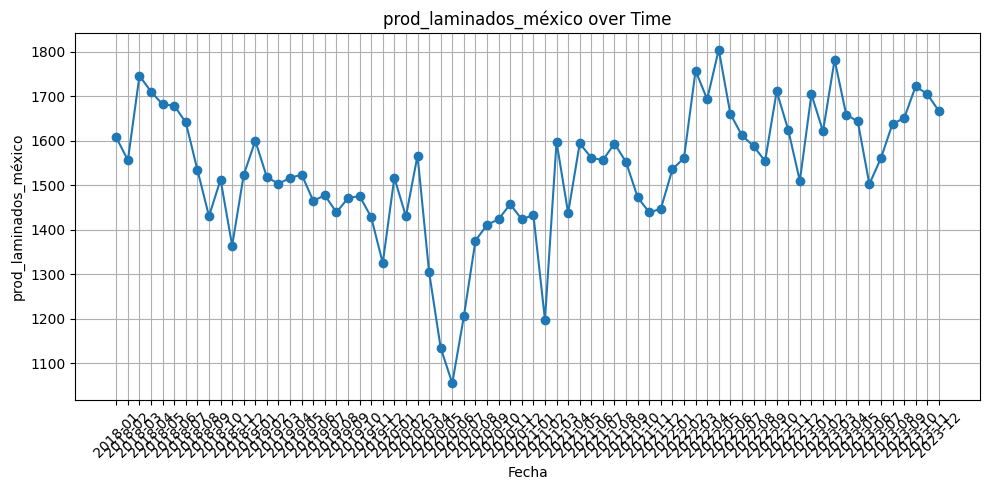

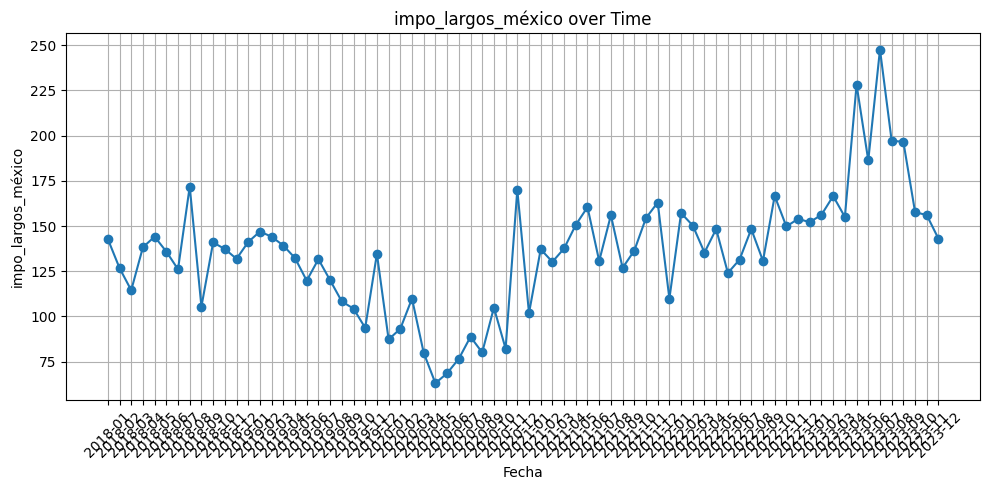

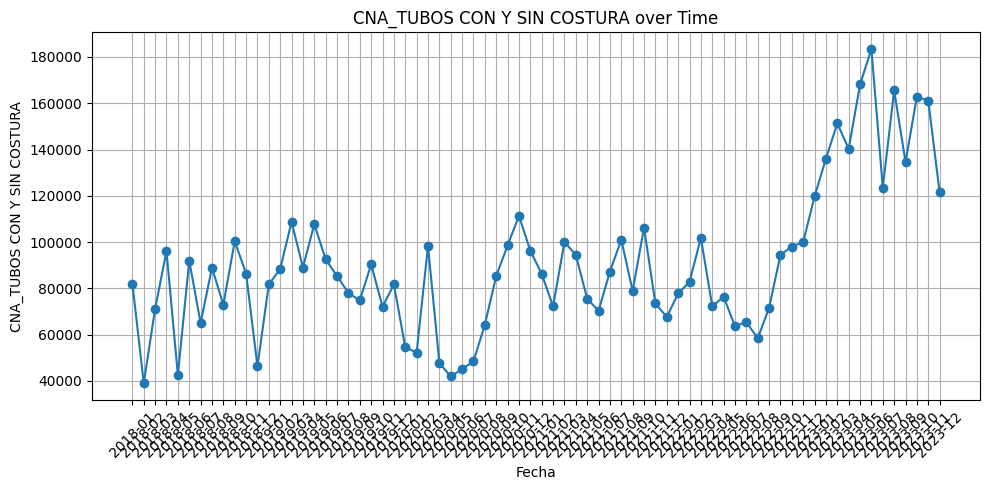

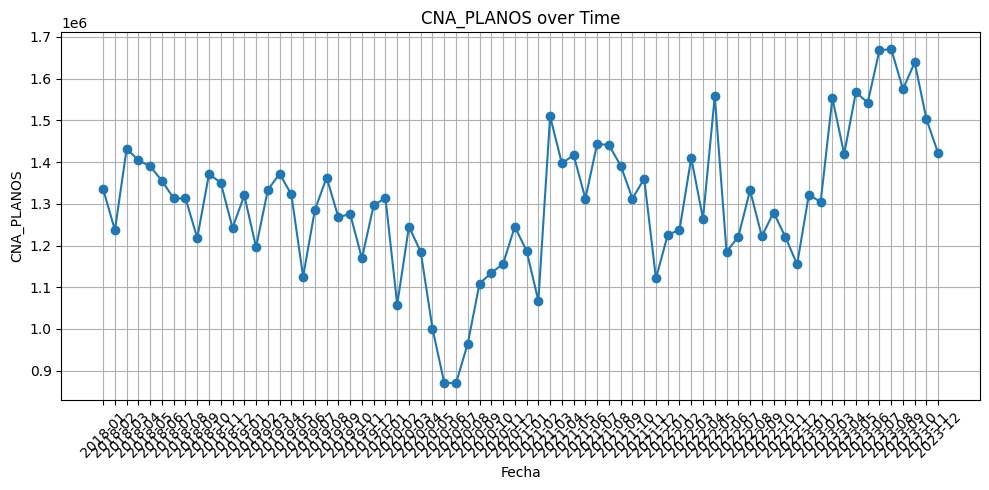

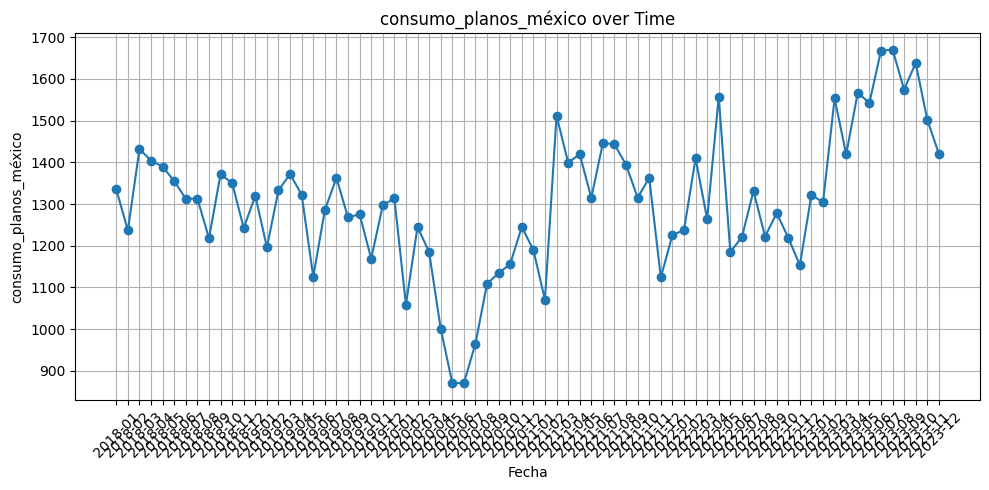

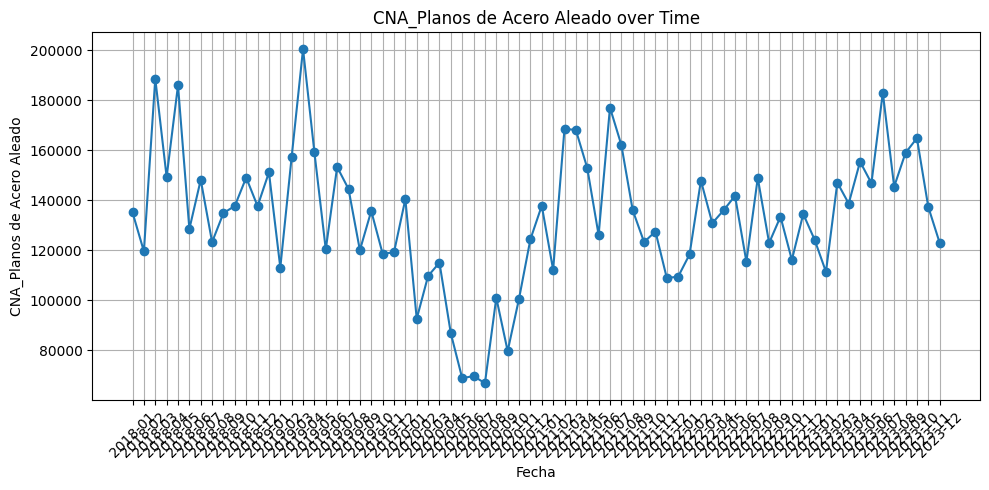

In [ ]:
import matplotlib.pyplot as plt

for col in columnas_sf:
    plt.figure(figsize=(10, 5))
    plt.plot(df_final2['Fecha'], df_final2[col], marker='o', linestyle='-')
    plt.title(f'{col} over Time')
    plt.xlabel('Fecha')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [ ]:
df_final2

,Fecha,prod_planos_méxico,consumo_laminados_méxico,CNA_Lámina con Recubrimiento,consumo_largos_méxico,CNA_Tubos con Costura,impo_laminados_méxico,impo_planos_brasil,impo_planos_méxico,prod_laminados_méxico,impo_largos_méxico,CNA_TUBOS CON Y SIN COSTURA,CNA_PLANOS,consumo_planos_méxico,CNA_Planos de Acero Aleado,fecha
0,2018-01,770.146813,2163.106881,379223.579186,795.761469,49576.167150,830.971594,143.091,673.429050,1607.193643,142.812529,81974.441344,1.334947e+06,1334.947138,135109.061258,2018-01-01
1,2018-02,761.866623,1957.082640,354291.919549,723.048718,41780.244033,726.746975,82.286,592.725119,1556.176769,126.756584,38982.266717,1.236832e+06,1236.831900,119510.208443,2018-02-01
2,2018-03,863.321877,2201.428714,385708.887123,740.947226,42795.540009,853.957399,145.543,730.678231,1745.844803,114.454704,71200.319632,1.432077e+06,1432.076708,188670.099244,2018-03-01
3,2018-04,832.753525,2200.330345,413319.697698,762.547615,62375.332984,862.456858,147.238,714.672826,1710.239661,138.259006,96065.322373,1.404093e+06,1404.092741,149263.455606,2018-04-01
4,2018-05,786.080621,2178.340664,409209.874720,790.255530,44113.359591,919.770018,132.972,761.837078,1681.513727,144.090818,42492.082585,1.389706e+06,1389.706412,185917.387628,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-08,804.066890,2586.205469,463122.706876,871.758805,121843.759145,1204.909417,255.465,985.817015,1638.009540,197.101752,165572.726034,1.670717e+06,1670.717698,145432.415102,2023-08-01
68,2023-09,789.159750,2475.743528,453312.635700,889.044223,122610.243011,1113.635981,331.758,901.500012,1650.406371,196.604749,134586.957596,1.574722e+06,1574.722590,158954.591075,2023-09-01
69,2023-10,830.079050,2563.084486,452186.458223,889.842694,128201.177437,1083.893613,226.722,916.432694,1722.543621,157.690859,162918.989376,1.638523e+06,1638.523980,164805.356465,2023-10-01
70,2023-11,795.201800,2458.436023,456068.081415,910.370699,115097.576908,1009.119001,232.648,835.734316,1704.537360,156.016328,161068.673929,1.502094e+06,1502.094228,137299.509867,2023-11-01


In [9]:
# Asegúrate de que la columna 'fecha' está en formato datetime
df_final2['Fecha'] = pd.to_datetime(df_final2['Fecha'])

# Ordena por fecha (opcional pero recomendado)
df_final2 = df_final2.sort_values('Fecha')

# Encuentra la fecha límite para separar los últimos 6 meses
fecha_corte = df_final2['Fecha'].max() - pd.DateOffset(months=6)

# Separa en train y test
train = df_final2[df_final2['Fecha'] < fecha_corte]
test = df_final2[df_final2['Fecha'] >= fecha_corte]


<ipython-input-9-009fb1a4c6eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2['Fecha'] = pd.to_datetime(df_final2['Fecha'])


In [10]:
test

,Fecha,CNA_Planos de Acero Aleado,CNA_TUBOS CON Y SIN COSTURA,consumo_laminados_méxico,impo_planos_brasil,impo_laminados_méxico,impo_planos_méxico,prod_laminados_méxico,prod_planos_méxico,impo_largos_méxico,CNA_PLANOS,consumo_planos_méxico,CNA_Tubos con Costura,consumo_largos_méxico,CNA_Lámina con Recubrimiento
65,2023-06-01,146787.908234,183440.650242,2434.775469,224.683,1190.295019,983.865955,1502.475040,671.13641,186.253414,1.542010e+06,1542.010574,125865.342240,835.189587,404867.863157
66,2023-07-01,183003.340507,123516.007672,2570.009454,226.162,1255.154234,995.281048,1560.697451,772.32631,247.605396,1.667433e+06,1667.433347,83764.414430,862.824513,444345.507521
67,2023-08-01,145432.415102,165572.726034,2586.205469,255.465,1204.909417,985.817015,1638.009540,804.06689,197.101752,1.670717e+06,1670.717698,121843.759145,871.758805,463122.706876
68,2023-09-01,158954.591075,134586.957596,2475.743528,331.758,1113.635981,901.500012,1650.406371,789.15975,196.604749,1.574722e+06,1574.722590,122610.243011,889.044223,453312.635700
69,2023-10-01,164805.356465,162918.989376,2563.084486,226.722,1083.893613,916.432694,1722.543621,830.07905,157.690859,1.638523e+06,1638.523980,128201.177437,889.842694,452186.458223
70,2023-11-01,137299.509867,161068.673929,2458.436023,232.648,1009.119001,835.734316,1704.537360,795.20180,156.016328,1.502094e+06,1502.094228,115097.576908,910.370699,456068.081415
71,2023-12-01,122946.570768,121423.931575,2227.675669,303.781,848.433183,689.448440,1666.818303,862.41363,142.957908,1.420700e+06,1420.700849,99455.688130,785.005456,383822.177647


In [11]:
pip install gudhi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 19.0 MB/s eta 0:00:00


In [155]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
import gudhi as gd
from gudhi.representations import Entropy
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from gudhi.representations import Landscape

# --- Parameters ---
window_size =   15 # Number of months in each Takens window
delay = 1
embedding_dim = 6

df_test_final = test[['Fecha']].rename(columns={'Fecha': 'ds'})


# --- Step 1: Normalize numeric data ---
df = train.copy()

numeric_cols = df.select_dtypes(include='number').columns
scaler = MinMaxScaler()
#scaler = StandardScaler()
#scaler = RobustScaler()


df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df['Fecha'] = pd.to_datetime(df['Fecha'])

max_embedding_dimension = 4
max_time_delay = 1
stride = 1

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

# --- Step 2: Takens Embedding ---
def takens_embedding(series, d=3, tau=1):
    return np.array([
        series[i:i + d * tau:tau]
        for i in range(len(series) - (d - 1) * tau)])

# --- Step 3: Extract Topological Features ---
def extract_topo_features(series_segment, num_landscape_coords=3):
    emb = embedder_periodic.fit_transform(series_segment)
    if len(emb) == 0:
        return {
            'tda_entropy': 0,
            'tda_max_life': 0,
            'tda_mean_life': 0,
            'tda_num_loops': 0,
            **{f'landscape_{i}': 0 for i in range(num_landscape_coords)}}

    rips_complex = gd.RipsComplex(points=emb, max_edge_length=1000.0)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=5)
    diag = simplex_tree.persistence()
    h1 = simplex_tree.persistence_intervals_in_dimension(1)

    if len(h1) == 0:
        h1 = np.array([[0.0, 0.0]])

    lifespans = h1[:, 1] - h1[:, 0]
    entropy_val = Entropy().fit_transform([h1])[0][0] if len(h1) > 0 else 0.0

    # --- Landscape features ---
    landscape = Landscape(num_landscapes=2, resolution=500)
    landscape_vals = landscape.fit_transform([h1])[0]
    #print(landscape_vals)
    # Tomamos las primeras coordenadas del landscape
    landscape_feats = {
        f'landscape_{i}': landscape_vals[i] if i < len(landscape_vals) else 0
        for i in range(num_landscape_coords)
    }

    return {
        'tda_entropy': entropy_val,
        'tda_max_life': np.max(lifespans),
        'tda_mean_life': np.mean(lifespans),
        'tda_num_loops': len(h1),
        **landscape_feats
    }

# --- Step 4: Build Feature DataFrame ---
records = []
for i in range(window_size, len(df)):
    window = df['CNA_PLANOS'].iloc[i - window_size:i].values
    topo_feats = extract_topo_features(window)
    row = {
        'ds': df['Fecha'].iloc[i],
        'y': df['CNA_PLANOS'].iloc[i],
        **topo_feats}
    records.append(row)

df_features = pd.DataFrame(records)

# --- Step 4.1: Calculate the window for the next date ---
for i in range(7):
  last_series = df_features['y'].iloc[-window_size:].values
  topo_feats1 = extract_topo_features(last_series)
  row1 = {
      'ds': df_features['ds'].iloc[-1] + relativedelta(months=1),
      'y': np.nan,
      **topo_feats1}

  fila = pd.DataFrame([row1])

  df_features = pd.concat([df_features, fila], ignore_index=True)

  df_features['tda_entropy'] = df_features['tda_entropy'].fillna(0.0)
  print(df_features)
  model = Prophet()
  model.add_regressor('tda_entropy')
  model.add_regressor('tda_max_life')
  model.add_regressor('tda_mean_life')
  model.add_regressor('tda_num_loops')
  model.add_regressor('landscape_0')
  model.add_regressor('landscape_1')
  model.add_regressor('landscape_2')

  model.fit(df_features)

  forecast = model.predict(df_features.drop('y', axis=1))
  df_features.loc[df_features.index[-1], 'y'] = forecast['yhat'].iloc[-1]

/usr/local/lib/python3.11/dist-packages/gudhi/representations/vector_methods.py:529: RuntimeWarning: invalid value encountered in divide
  p = p/np.sum(p)
/usr/local/lib/python3.11/dist-packages/gudhi/representations/vector_methods.py:529: RuntimeWarning: invalid value encountered in divide
  p = p/np.sum(p)
/usr/local/lib/python3.11/dist-packages/gudhi/representations/vector_methods.py:529: RuntimeWarning: invalid value encountered in divide
  p = p/np.sum(p)


First value and second value in range are the same: grid is made of resolution copies of this value
First value and second value in range are the same: grid is made of resolution copies of this value
First value and second value in range are the same: grid is made of resolution copies of this value


/usr/local/lib/python3.11/dist-packages/gudhi/representations/vector_methods.py:529: RuntimeWarning: invalid value encountered in divide
  p = p/np.sum(p)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/nnm5eawh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/dvae83bw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77872', 'data', 'file=/tmp/tmpurb4213c/nnm5eawh.json', 'init=/tmp/tmpurb4213c/dvae83bw.json', 'output', 'file=/tmp/tmpurb4213c/prophet_model_u7dpupv/prophet_model-20250609210339.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:03:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1

First value and second value in range are the same: grid is made of resolution copies of this value
           ds         y  tda_entropy  tda_max_life  tda_mean_life  \
0  2019-04-01  0.719639     0.692931      0.006648       0.006513   
1  2019-05-01  0.648330     0.960191      0.018800       0.010609   
2  2019-06-01  0.365945     0.948327      0.048125       0.026864   
3  2019-07-01  0.595145     0.948327      0.048125       0.026864   
4  2019-08-01  0.706571     0.948327      0.048125       0.026864   
5  2019-09-01  0.570187     1.038484      0.048125       0.031971   
6  2019-10-01  0.581568     0.972252      0.051086       0.030269   
7  2019-11-01  0.428504     0.051981      0.038068       0.019209   
8  2019-12-01  0.611448     0.271235      0.012854       0.006963   
9  2020-01-01  0.636221     0.586105      0.034251       0.023552   
10 2020-02-01  0.270345     0.254341      0.042297       0.022747   
11 2020-03-01  0.538123     0.207981      0.056838       0.030017   
12 

21:03:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/udkk03oy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/yxs3thco.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26534', 'data', 'file=/tmp/tmpurb4213c/udkk03oy.json', 'init=/tmp/tmpurb4213c/yxs3thco.json', 'output', 'file=/tmp/tmpurb4213c/prophet_modela8zg556o/prophet_model-20250609210339.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:03:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


           ds         y  tda_entropy  tda_max_life  tda_mean_life  \
0  2019-04-01  0.719639     0.692931      0.006648       0.006513   
1  2019-05-01  0.648330     0.960191      0.018800       0.010609   
2  2019-06-01  0.365945     0.948327      0.048125       0.026864   
3  2019-07-01  0.595145     0.948327      0.048125       0.026864   
4  2019-08-01  0.706571     0.948327      0.048125       0.026864   
5  2019-09-01  0.570187     1.038484      0.048125       0.031971   
6  2019-10-01  0.581568     0.972252      0.051086       0.030269   
7  2019-11-01  0.428504     0.051981      0.038068       0.019209   
8  2019-12-01  0.611448     0.271235      0.012854       0.006963   
9  2020-01-01  0.636221     0.586105      0.034251       0.023552   
10 2020-02-01  0.270345     0.254341      0.042297       0.022747   
11 2020-03-01  0.538123     0.207981      0.056838       0.030017   
12 2020-04-01  0.451017     0.332256      0.056838       0.031692   
13 2020-05-01  0.187633     0.2148

21:03:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/xp7zx2ug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/oj05vq2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55303', 'data', 'file=/tmp/tmpurb4213c/xp7zx2ug.json', 'init=/tmp/tmpurb4213c/oj05vq2z.json', 'output', 'file=/tmp/tmpurb4213c/prophet_modelgjou1aoq/prophet_model-20250609210340.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:03:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


           ds         y  tda_entropy  tda_max_life  tda_mean_life  \
0  2019-04-01  0.719639     0.692931      0.006648       0.006513   
1  2019-05-01  0.648330     0.960191      0.018800       0.010609   
2  2019-06-01  0.365945     0.948327      0.048125       0.026864   
3  2019-07-01  0.595145     0.948327      0.048125       0.026864   
4  2019-08-01  0.706571     0.948327      0.048125       0.026864   
5  2019-09-01  0.570187     1.038484      0.048125       0.031971   
6  2019-10-01  0.581568     0.972252      0.051086       0.030269   
7  2019-11-01  0.428504     0.051981      0.038068       0.019209   
8  2019-12-01  0.611448     0.271235      0.012854       0.006963   
9  2020-01-01  0.636221     0.586105      0.034251       0.023552   
10 2020-02-01  0.270345     0.254341      0.042297       0.022747   
11 2020-03-01  0.538123     0.207981      0.056838       0.030017   
12 2020-04-01  0.451017     0.332256      0.056838       0.031692   
13 2020-05-01  0.187633     0.2148

21:03:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/hmq6g1wi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/8a5w4bt5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67094', 'data', 'file=/tmp/tmpurb4213c/hmq6g1wi.json', 'init=/tmp/tmpurb4213c/8a5w4bt5.json', 'output', 'file=/tmp/tmpurb4213c/prophet_modeljjzfd49o/prophet_model-20250609210340.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:03:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


           ds         y  tda_entropy  tda_max_life  tda_mean_life  \
0  2019-04-01  0.719639     0.692931      0.006648       0.006513   
1  2019-05-01  0.648330     0.960191      0.018800       0.010609   
2  2019-06-01  0.365945     0.948327      0.048125       0.026864   
3  2019-07-01  0.595145     0.948327      0.048125       0.026864   
4  2019-08-01  0.706571     0.948327      0.048125       0.026864   
5  2019-09-01  0.570187     1.038484      0.048125       0.031971   
6  2019-10-01  0.581568     0.972252      0.051086       0.030269   
7  2019-11-01  0.428504     0.051981      0.038068       0.019209   
8  2019-12-01  0.611448     0.271235      0.012854       0.006963   
9  2020-01-01  0.636221     0.586105      0.034251       0.023552   
10 2020-02-01  0.270345     0.254341      0.042297       0.022747   
11 2020-03-01  0.538123     0.207981      0.056838       0.030017   
12 2020-04-01  0.451017     0.332256      0.056838       0.031692   
13 2020-05-01  0.187633     0.2148

21:03:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/leopdtum.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/ylq6k46x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67951', 'data', 'file=/tmp/tmpurb4213c/leopdtum.json', 'init=/tmp/tmpurb4213c/ylq6k46x.json', 'output', 'file=/tmp/tmpurb4213c/prophet_model8_ny8yfv/prophet_model-20250609210341.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:03:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


           ds         y  tda_entropy  tda_max_life  tda_mean_life  \
0  2019-04-01  0.719639     0.692931      0.006648       0.006513   
1  2019-05-01  0.648330     0.960191      0.018800       0.010609   
2  2019-06-01  0.365945     0.948327      0.048125       0.026864   
3  2019-07-01  0.595145     0.948327      0.048125       0.026864   
4  2019-08-01  0.706571     0.948327      0.048125       0.026864   
5  2019-09-01  0.570187     1.038484      0.048125       0.031971   
6  2019-10-01  0.581568     0.972252      0.051086       0.030269   
7  2019-11-01  0.428504     0.051981      0.038068       0.019209   
8  2019-12-01  0.611448     0.271235      0.012854       0.006963   
9  2020-01-01  0.636221     0.586105      0.034251       0.023552   
10 2020-02-01  0.270345     0.254341      0.042297       0.022747   
11 2020-03-01  0.538123     0.207981      0.056838       0.030017   
12 2020-04-01  0.451017     0.332256      0.056838       0.031692   
13 2020-05-01  0.187633     0.2148

21:03:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/wh8n508q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/jf1ryr0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48456', 'data', 'file=/tmp/tmpurb4213c/wh8n508q.json', 'init=/tmp/tmpurb4213c/jf1ryr0o.json', 'output', 'file=/tmp/tmpurb4213c/prophet_modelebwdwoxh/prophet_model-20250609210342.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:03:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


           ds         y  tda_entropy  tda_max_life  tda_mean_life  \
0  2019-04-01  0.719639     0.692931      0.006648       0.006513   
1  2019-05-01  0.648330     0.960191      0.018800       0.010609   
2  2019-06-01  0.365945     0.948327      0.048125       0.026864   
3  2019-07-01  0.595145     0.948327      0.048125       0.026864   
4  2019-08-01  0.706571     0.948327      0.048125       0.026864   
5  2019-09-01  0.570187     1.038484      0.048125       0.031971   
6  2019-10-01  0.581568     0.972252      0.051086       0.030269   
7  2019-11-01  0.428504     0.051981      0.038068       0.019209   
8  2019-12-01  0.611448     0.271235      0.012854       0.006963   
9  2020-01-01  0.636221     0.586105      0.034251       0.023552   
10 2020-02-01  0.270345     0.254341      0.042297       0.022747   
11 2020-03-01  0.538123     0.207981      0.056838       0.030017   
12 2020-04-01  0.451017     0.332256      0.056838       0.031692   
13 2020-05-01  0.187633     0.2148

21:03:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/ak1b583z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurb4213c/zbtxlzcs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96390', 'data', 'file=/tmp/tmpurb4213c/ak1b583z.json', 'init=/tmp/tmpurb4213c/zbtxlzcs.json', 'output', 'file=/tmp/tmpurb4213c/prophet_modelbufn0zll/prophet_model-20250609210342.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:03:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


           ds         y  tda_entropy  tda_max_life  tda_mean_life  \
0  2019-04-01  0.719639     0.692931      0.006648       0.006513   
1  2019-05-01  0.648330     0.960191      0.018800       0.010609   
2  2019-06-01  0.365945     0.948327      0.048125       0.026864   
3  2019-07-01  0.595145     0.948327      0.048125       0.026864   
4  2019-08-01  0.706571     0.948327      0.048125       0.026864   
5  2019-09-01  0.570187     1.038484      0.048125       0.031971   
6  2019-10-01  0.581568     0.972252      0.051086       0.030269   
7  2019-11-01  0.428504     0.051981      0.038068       0.019209   
8  2019-12-01  0.611448     0.271235      0.012854       0.006963   
9  2020-01-01  0.636221     0.586105      0.034251       0.023552   
10 2020-02-01  0.270345     0.254341      0.042297       0.022747   
11 2020-03-01  0.538123     0.207981      0.056838       0.030017   
12 2020-04-01  0.451017     0.332256      0.056838       0.031692   
13 2020-05-01  0.187633     0.2148

21:03:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


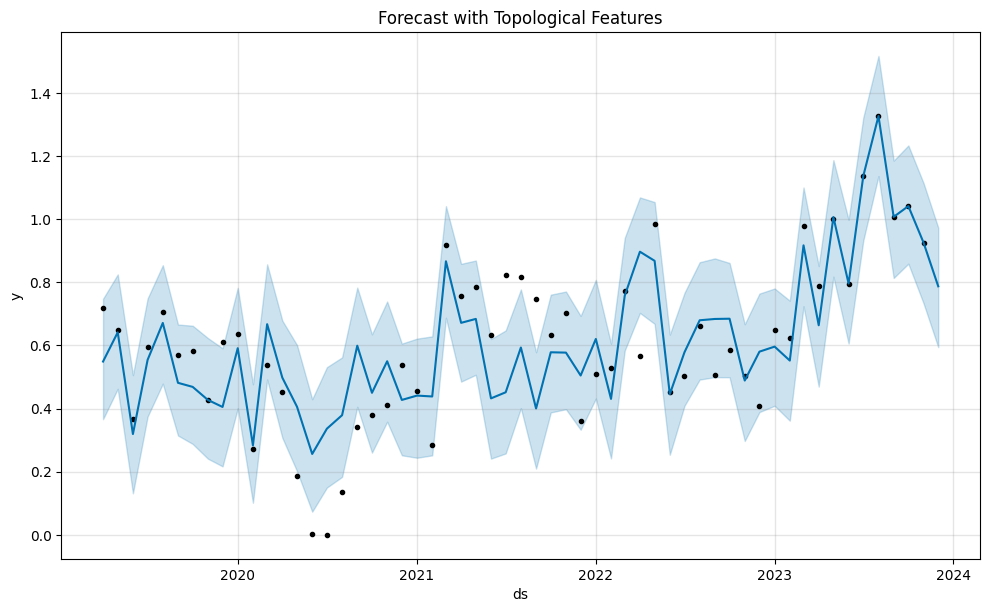

In [156]:
model.plot(forecast)
plt.title("Forecast with Topological Features")
plt.show()

In [157]:
df_features

,ds,y,tda_entropy,tda_max_life,tda_mean_life,tda_num_loops,landscape_0,landscape_1,landscape_2
0,2019-04-01,0.719639,0.692931,0.006648,0.006513,2,0.000049,0.000098,0.000146
1,2019-05-01,0.648330,0.960191,0.018800,0.010609,3,0.000127,0.000253,0.000380
2,2019-06-01,0.365945,0.948327,0.048125,0.026864,3,0.000136,0.000272,0.000408
3,2019-07-01,0.595145,0.948327,0.048125,0.026864,3,0.000136,0.000272,0.000408
4,2019-08-01,0.706571,0.948327,0.048125,0.026864,3,0.000136,0.000272,0.000408
5,2019-09-01,0.570187,1.038484,0.048125,0.031971,3,0.000136,0.000272,0.000408
6,2019-10-01,0.581568,0.972252,0.051086,0.030269,3,0.000144,0.000288,0.000433
7,2019-11-01,0.428504,0.051981,0.038068,0.019209,2,0.000114,0.000228,0.000154
8,2019-12-01,0.611448,0.271235,0.012854,0.006963,2,0.000153,0.000307,0.000460
9,2020-01-01,0.636221,0.586105,0.034251,0.023552,2,0.000320,0.000640,0.000960


In [158]:
y_min = train['CNA_PLANOS'].min()
y_max = train['CNA_PLANOS'].max()
forecast['yhat_real'] = forecast['yhat'] * (y_max - y_min) + y_min

In [159]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,tda_num_loops_lower,tda_num_loops_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,yhat_real
0,2019-04-01,0.432807,0.366136,0.747740,0.432807,0.432807,0.116032,0.116032,0.116032,0.110348,...,0.006349,0.006349,0.005684,0.005684,0.005684,0.0,0.0,0.0,0.548840,1.252847e+06
1,2019-05-01,0.439809,0.462470,0.824889,0.439809,0.439809,0.201579,0.201579,0.201579,0.111678,...,-0.112165,-0.112165,0.089901,0.089901,0.089901,0.0,0.0,0.0,0.641387,1.317389e+06
2,2019-06-01,0.447043,0.131337,0.505948,0.447043,0.447043,-0.127958,-0.127958,-0.127958,0.065909,...,-0.112165,-0.112165,-0.193866,-0.193866,-0.193866,0.0,0.0,0.0,0.319085,1.092618e+06
3,2019-07-01,0.454044,0.374551,0.748812,0.454044,0.454044,0.100199,0.100199,0.100199,0.065909,...,-0.112165,-0.112165,0.034290,0.034290,0.034290,0.0,0.0,0.0,0.554243,1.256615e+06
4,2019-08-01,0.461279,0.478600,0.854045,0.461279,0.461279,0.209876,0.209876,0.209876,0.065909,...,-0.112165,-0.112165,0.143968,0.143968,0.143968,0.0,0.0,0.0,0.671155,1.338149e+06
5,2019-09-01,0.468513,0.314538,0.666130,0.468513,0.468513,0.012952,0.012952,0.012952,0.128326,...,-0.112165,-0.112165,-0.115374,-0.115374,-0.115374,0.0,0.0,0.0,0.481466,1.205861e+06
6,2019-10-01,0.475514,0.287844,0.662356,0.475514,0.475514,-0.006970,-0.006970,-0.006970,0.081242,...,-0.112165,-0.112165,-0.088212,-0.088212,-0.088212,0.0,0.0,0.0,0.468544,1.196850e+06
7,2019-11-01,0.482749,0.241131,0.623368,0.482749,0.482749,-0.055481,-0.055481,-0.055481,0.056179,...,0.006349,0.006349,-0.111660,-0.111660,-0.111660,0.0,0.0,0.0,0.427267,1.168064e+06
8,2019-12-01,0.489750,0.216768,0.590845,0.489750,0.489750,-0.084817,-0.084817,-0.084817,-0.097988,...,0.006349,0.006349,0.013172,0.013172,0.013172,0.0,0.0,0.0,0.404933,1.152488e+06
9,2020-01-01,0.496984,0.400848,0.782325,0.496984,0.496984,0.094258,0.094258,0.094258,0.074434,...,0.006349,0.006349,0.019824,0.019824,0.019824,0.0,0.0,0.0,0.591242,1.282419e+06


In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# True and predicted values
true_values = test['CNA_PLANOS'].values

predicted_values = forecast['yhat_real'].iloc[-7:]

# Metrics
mae = mean_absolute_error(true_values, predicted_values)
rmse = mean_squared_error(true_values, predicted_values, squared=False)
r2 = r2_score(true_values, predicted_values)
mape = mean_absolute_percentage_error(true_values, predicted_values)

# Print results
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MAPE Score: {mape:.4f}")

MAE: 43702.68
RMSE: 66760.38
R² Score: 0.3994
MAPE Score: 0.0272


In [161]:
df_test_final = test[['Fecha']].rename(columns={'Fecha': 'ds'})
df_test_final

,ds
65,2023-06-01
66,2023-07-01
67,2023-08-01
68,2023-09-01
69,2023-10-01
70,2023-11-01
71,2023-12-01


In [57]:
df_test_future = df_test_final[['ds']]
df_test_future

,ds
65,2023-06-01
66,2023-07-01
67,2023-08-01
68,2023-09-01
69,2023-10-01
70,2023-11-01
71,2023-12-01


In [162]:
compare_df = pd.DataFrame({
    'Fecha': df_test_future['ds'].values,
    'cna_planos_predicted': forecast['yhat_real'].iloc[-7:].values,
    'cna_planos_real': test['CNA_PLANOS'].values  # from original test before dropping the column
})

In [163]:
import plotly.graph_objects as go

fig = go.Figure()

# Real values
fig.add_trace(go.Scatter(
    x=compare_df['Fecha'],
    y=compare_df['cna_planos_real'],
    mode='lines+markers',
    name='Real CNA Planos',
    line=dict(color='blue')
))

# Predicted values
fig.add_trace(go.Scatter(
    x=compare_df['Fecha'],
    y=compare_df['cna_planos_predicted'],
    mode='lines+markers',
    name='Predicted CNA Planos',
    line=dict(color='orange', dash='dash')
))

# Layout
fig.update_layout(
    title='CNA Planos: Real vs Predicted',
    xaxis_title='Fecha',
    yaxis_title='CNA Planos',
    template='plotly_white',
    legend=dict(x=0, y=1),
    hovermode='x unified'
)

fig.show()

In [169]:
import plotly.graph_objects as go

def plot_embedding_3d(series_segment, title="Takens Embedding (3D)"):
    emb = embedder_periodic.fit_transform(series_segment)
    print(emb.shape)
    if emb.shape[1] < 3:
        print("Embedding dimension < 3; cannot plot in 3D.")
        return

    fig = go.Figure(data=[
        go.Scatter3d(
            x=emb[:, 0],
            y=emb[:, 1],
            z=emb[:, 2],
            mode='lines+markers',
            marker=dict(size=4, color='blue', opacity=0.8),
            line=dict(color='darkblue', width=2)
        )
    ])

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title="x(t)",
            yaxis_title="x(t+τ)",
            zaxis_title="x(t+2τ)"
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    fig.show()


In [171]:
# Suppose you want to test on a window from your training data
valor_a_ver=3
sample_window = train['CNA_PLANOS'].iloc[valor_a_ver:window_size+valor_a_ver].values  # Make sure it matches window_size

# Plot it
plot_embedding_3d(sample_window)

# Extract topo features
features = extract_topo_features(sample_window)
print(features)


(12, 4)


First value and second value in range are the same: grid is made of resolution copies of this value
{'tda_entropy': nan, 'tda_max_life': 0.0, 'tda_mean_life': 0.0, 'tda_num_loops': 1, 'landscape_0': 0.0, 'landscape_1': 0.0, 'landscape_2': 0.0}


/usr/local/lib/python3.11/dist-packages/gudhi/representations/vector_methods.py:529: RuntimeWarning:

invalid value encountered in divide



In [ ]:
import gudhi

In [ ]:
from prophet import Prophet

# Prepare train data
df_prophet_train = train[['Fecha', 'CNA_PLANOS']].rename(columns={
    'Fecha': 'ds',
    'CNA_PLANOS': 'y'
})

In [ ]:
# Initialize and fit the model
model = Prophet()
model.fit(df_prophet_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmygmmmr6/ob89eoqm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmygmmmr6/w_ba1r8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63355', 'data', 'file=/tmp/tmpmygmmmr6/ob89eoqm.json', 'init=/tmp/tmpmygmmmr6/w_ba1r8e.json', 'output', 'file=/tmp/tmpmygmmmr6/prophet_modelagit5kow/prophet_model-20250608072829.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:28:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(df_test_future)

In [ ]:
df_test_final['cna_planos_predicted'] = forecast['yhat'].values

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# True and predicted values
true_values = test['CNA_PLANOS'].values
predicted_values = forecast['yhat'].values

# Metrics
mae = mean_absolute_error(true_values, predicted_values)
rmse = mean_squared_error(true_values, predicted_values, squared=False)
r2 = r2_score(true_values, predicted_values)

# Print results
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 234442.34
RMSE: 247688.49
R² Score: -7.2678


In [ ]:
compare_df = pd.DataFrame({
    'Fecha': df_test_future['ds'].values,
    'cna_planos_predicted': forecast['yhat'].values,
    'cna_planos_real': test['CNA_PLANOS'].values  # from original test before dropping the column
})

In [ ]:
compare_df

,Fecha,cna_planos_predicted,cna_planos_real
0,2023-06-01,1.235788e+06,1.542010e+06
1,2023-07-01,1.342697e+06,1.667433e+06
2,2023-08-01,1.425095e+06,1.670717e+06
3,2023-09-01,1.299870e+06,1.574722e+06
4,2023-10-01,1.393146e+06,1.638523e+06
5,2023-11-01,1.333584e+06,1.502094e+06
6,2023-12-01,1.344923e+06,1.420700e+06


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Real values
fig.add_trace(go.Scatter(
    x=compare_df['Fecha'],
    y=compare_df['cna_planos_real'],
    mode='lines+markers',
    name='Real CNA Planos',
    line=dict(color='blue')
))

# Predicted values
fig.add_trace(go.Scatter(
    x=compare_df['Fecha'],
    y=compare_df['cna_planos_predicted'],
    mode='lines+markers',
    name='Predicted CNA Planos',
    line=dict(color='orange', dash='dash')
))

# Layout
fig.update_layout(
    title='CNA Planos: Real vs Predicted',
    xaxis_title='Fecha',
    yaxis_title='CNA Planos',
    template='plotly_white',
    legend=dict(x=0, y=1),
    hovermode='x unified'
)

fig.show()
